In [6]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model


import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline
import math
import h5py


In [7]:
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

def load_dataset():
    train_dataset = h5py.File('datasets/train_happy.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_happy.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


In [8]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


In [9]:
def HappyModel(input_shape):
    
    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((2, 2), name='max_pool0')(X)
    
    X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv1')(X)
    X = BatchNormalization(axis = 3, name = 'bn1')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    model = Model(inputs = X_input, outputs = X, name='HappyModel')

    
 
    
    return model

In [10]:
happyModel = HappyModel(X_train.shape[1:])

In [11]:
happyModel.compile(optimizer =  "adam" , loss = "binary_crossentropy", metrics = ["accuracy"])

In [12]:
happyModel.fit(x = X_train, y = Y_train, epochs = 40, batch_size = 40)

Epoch 1/40
600/600 [==============================] - 41s 68ms/step - loss: 0.8382 - acc: 0.6083
Epoch 2/40
600/600 [==============================] - 30s 51ms/step - loss: 0.3825 - acc: 0.8133
Epoch 3/40
600/600 [==============================] - 30s 49ms/step - loss: 0.2359 - acc: 0.9167
Epoch 4/40
600/600 [==============================] - 36s 60ms/step - loss: 0.1769 - acc: 0.9417
Epoch 5/40
600/600 [==============================] - 36s 60ms/step - loss: 0.1172 - acc: 0.9733
Epoch 6/40
600/600 [==============================] - 34s 57ms/step - loss: 0.0966 - acc: 0.9767
Epoch 7/40
600/600 [==============================] - 29s 48ms/step - loss: 0.0840 - acc: 0.9783
Epoch 8/40
600/600 [==============================] - 28s 47ms/step - loss: 0.0738 - acc: 0.9800
Epoch 9/40
600/600 [==============================] - 28s 47ms/step - loss: 0.0755 - acc: 0.9850
Epoch 10/40
600/600 [==============================] - 30s 49ms/step - loss: 0.0589 - acc: 0.9867
Epoch 11/40
600/600 [========

In [13]:
preds = happyModel.evaluate(x = X_test, y = Y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

150/150 [==============================] - 9s 61ms/step
Loss = 0.0852309578657
Test Accuracy = 0.960000003974


[[ 1.]]


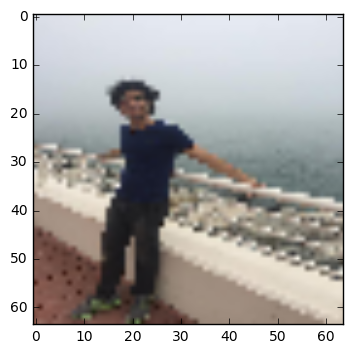

In [18]:
img_path = r'C:\Users\Dell\Desktop\26047224_10203966463639066_2587936646057559005_n.jpg'

img = image.load_img(img_path, target_size=(64, 64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(happyModel.predict(x))

In [16]:
happyModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pool0 (MaxPooling2D)     (None, 32, 32, 32)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 30, 30, 32)        9248      
__________